In [37]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.interpolate import interp1d

In [2]:
generalparams = {'gauge':'newtonian',
                  'output':'tCl',
                  'omega_cdm':0.12038,
                  #'z_reio':11.357,
                  #'reionization_z_start_max':750,
                  #'z_reiomod_start':300,
                  #'recfast_Nz0':80000,
                  #'recfast_z_initial':1e7,
                  'recombination':'recfast',
                  #'recfast_H_frac':3e-4,
                  'reio_parametrization':'reio_none',
                  #'100*theta_s':1.042143,
                  'background_verbose':5,
                  'input_verbose':5,
                  'h':0.67556
                 }

idmparams = {'a_bidm':5e-4,
                      'f_bidm':0.99,
                      'A_bidm':1.7e-41,
                      'm_bidm':1,
                      'n_bidm':-4,
                      'bidm_type':'powerlaw'}

cosmo = Class()
cosmoRef = Class()

cosmo.set(generalparams)
cosmoRef.set(generalparams)

cosmo.set(idmparams)

True

In [3]:
cosmo.compute()
cosmoRef.compute()

In [8]:
bg = cosmo.get_background()
bgref = cosmoRef.get_background()

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_ur', '(.)rho_bidm', '(.)rho_crit', 'gr.fac. D', 'gr.fac. f'])

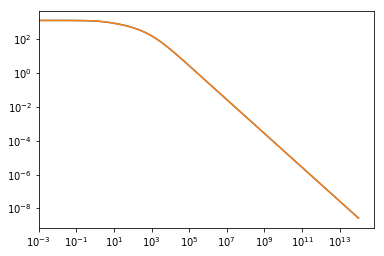

In [9]:
plt.loglog(bg['z'],bg['comov.snd.hrz.'])
plt.loglog(bgref['z'], bgref['comov.snd.hrz.'])

In [10]:
rs = interp1d(bg['z'],bg['comov.snd.hrz.'])
rsref = interp1d(bgref['z'], bgref['comov.snd.hrz.'])

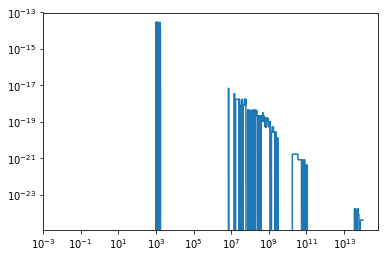

In [36]:
plt.loglog(bg['z'],abs(rs(bg['z'])-rsref(bg['z'])))


In [13]:
th = cosmo.get_thermodynamics()
thref = cosmoRef.get_thermodynamics()

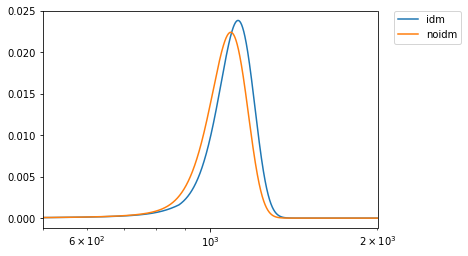

In [21]:
plt.semilogx(th['z'],th['g [Mpc^-1]'],label = 'idm')
plt.semilogx(thref['z'],thref['g [Mpc^-1]'], label = 'noidm')
plt.xlim([5e2,2e3])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [27]:
irec=th['g [Mpc^-1]'].argmax()
irecref=thref['g [Mpc^-1]'].argmax()

In [28]:
zrec = th['z'][irec]
zrecref = thref['z'][irecref]

In [30]:
rs_rec = rs(zrec)
rs_rec_ref = rsref(zrecref)
print('rs_rec ='+str(rs_rec))
print('rs_rec_ref ='+str(rs_rec_ref))

rs_rec =141.85647047474063
rs_rec_ref =144.7199794503243


In [32]:
print('z_rec ='+str(zrec))
print('z_rec_ref ='+str(zrecref))

z_rec =1122.5
z_rec_ref =1089.0


In [ ]:
cosmo.